# Edit distance problem question with example:
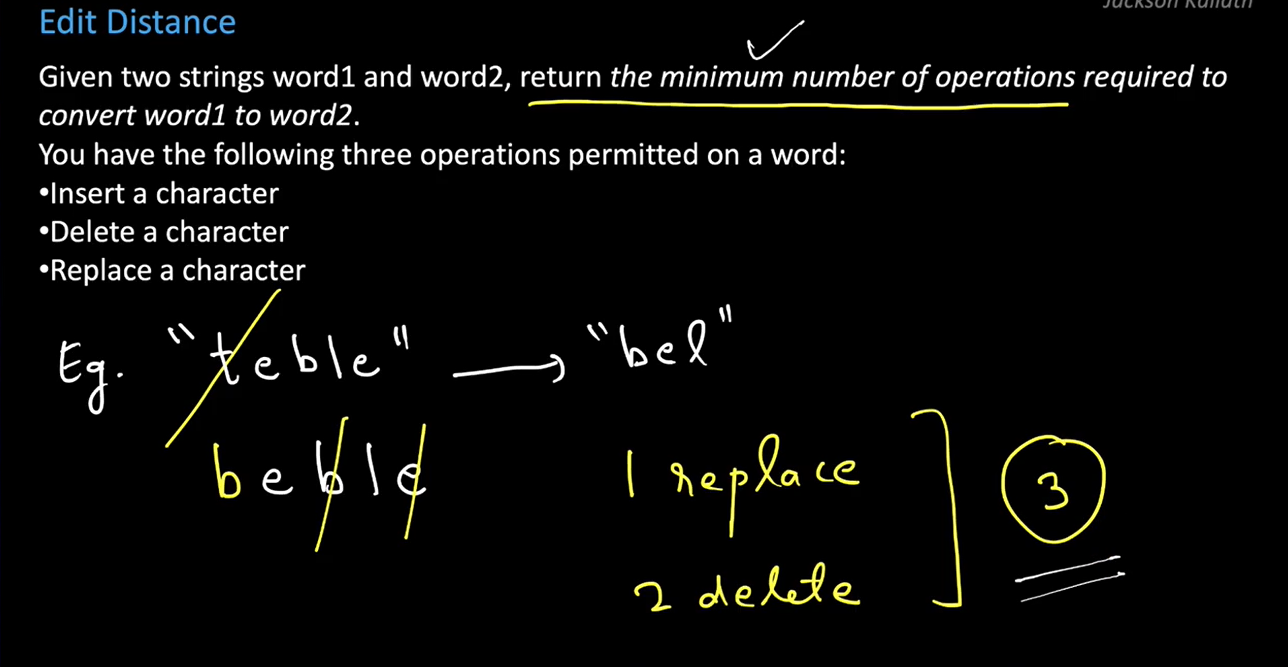
### as here in example word1= teble and wrod2 = bel 
### so for converting wrod1 to wrod2 with minimum number of operations would be :
- word1=  beble   [replacing 't' with 'b']
- word1=  bele   [delete 'b']
- word1=  bel   [delete 'e']  
- henace word1 = bel = word2  [need minimum 3 operations ; 1 replacement & 2 deletion operation ]
# Edit distance problem sidenote:
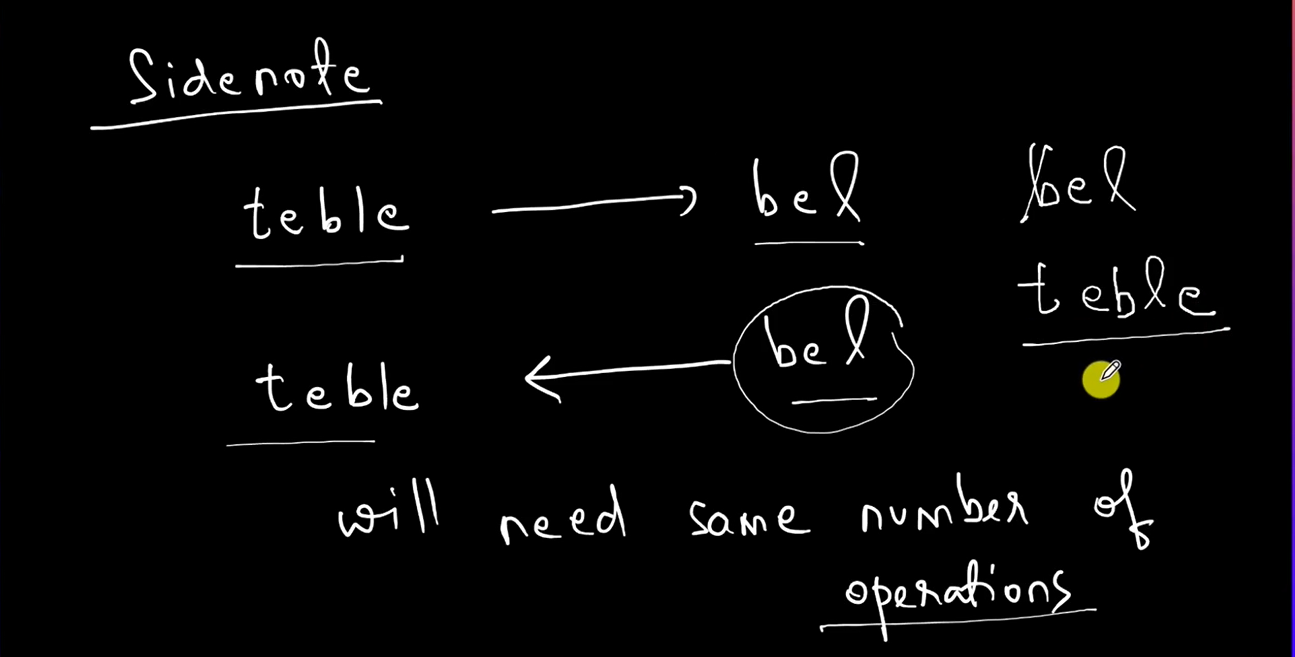
### here important things to understand is that if converting word1 to word2 takes minimum 3 operations then converting word2 back to word1 would also take three operations [type of operations can be change]
# Edit distance problem clarifying question:
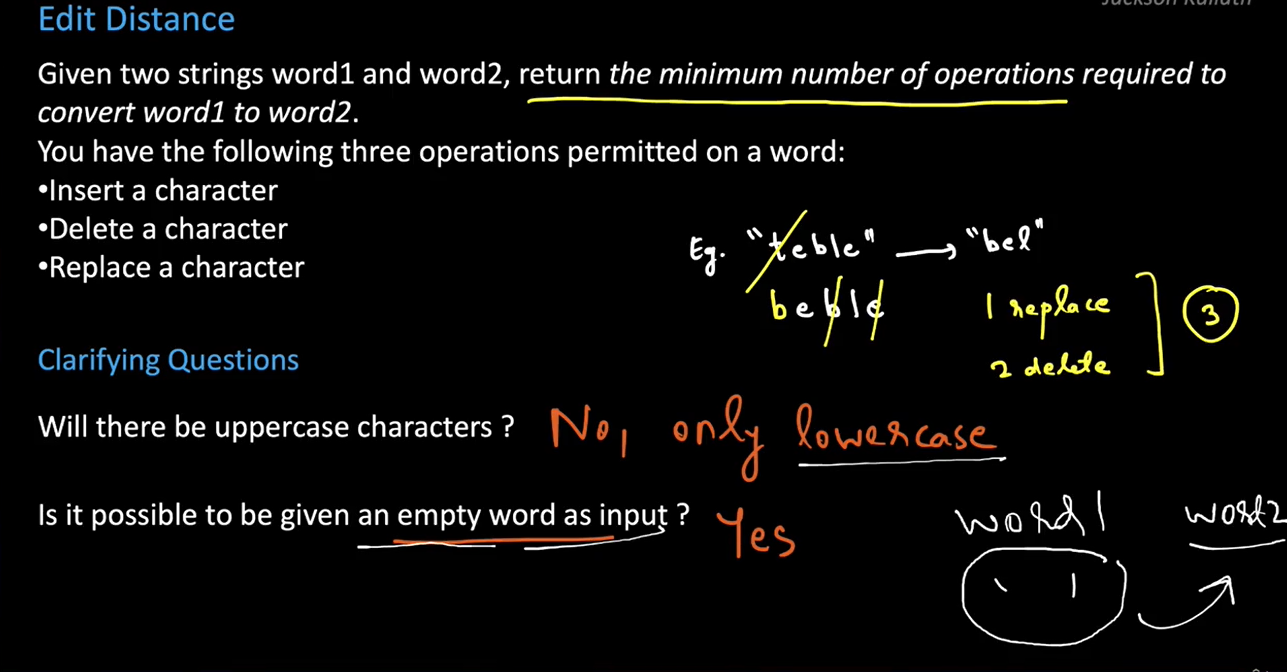
# Edit distance problem test-cases:
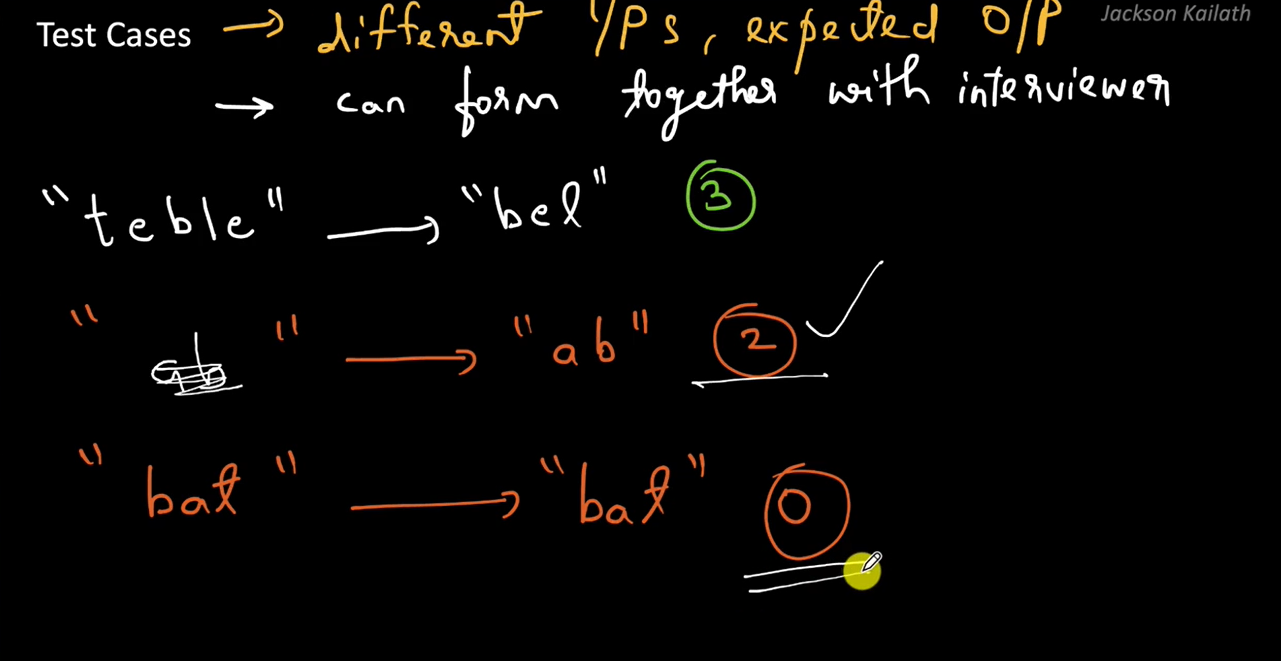
# Coding Exercise: Edit Distance
### Given two strings word1 and word2, return the minimum number of operations required to convert word1 to word2.

### You have the following three operations permitted on a word:

- Insert a character

- Delete a character

- Replace a character

### Example: 

- Input: word1 = "hodse", word2 = "dos"
- Output: 3
### Explanation: 
- hodse -> dodse (replace 'h' with 'd')
- dodse -> dose (remove 'd')
- dose -> dos (remove 'e')
# Why this problem(EDit distance) is a type of or variations of LCS problem [how this particular problem has DP-features]:
### as we know that in the LCS problem there're scnerios while traversing over two strings:
### if chars on indexes of both string matched (equal) then we will move both the indexes to the next.
### if chars on indexes of both string NOT matched (NOT equal) then we will move one of the index to the next while remain other index of string same(constant)    or we w'll do the vice-versa of this.

### similarly here in Edit distance problem as well there're scenerios while traversing over two strings:
### if chars on indexes of both string matched (equal) then No operations needed.
### if chars on indexes of both string NOT matched (NOTequal) then we will check possibilities among all 3 operations :-
1. delete operation [deleting char on current ongoing index of word1]
2. insert operation [inserting char on current ongoing index of word1] 
1. replace operation [replace char(based on char of word2) on current ongoing index of word1] 


### this edit distance problem also has optimal sub-structure feature of DP as here we're asked to find minimum operations to convert string1 to string2 or word1 to word2
### it will definately has overlapping-subproblems as we had in the case of LCS problem
### hence this problem can be solve using dynamic-programming
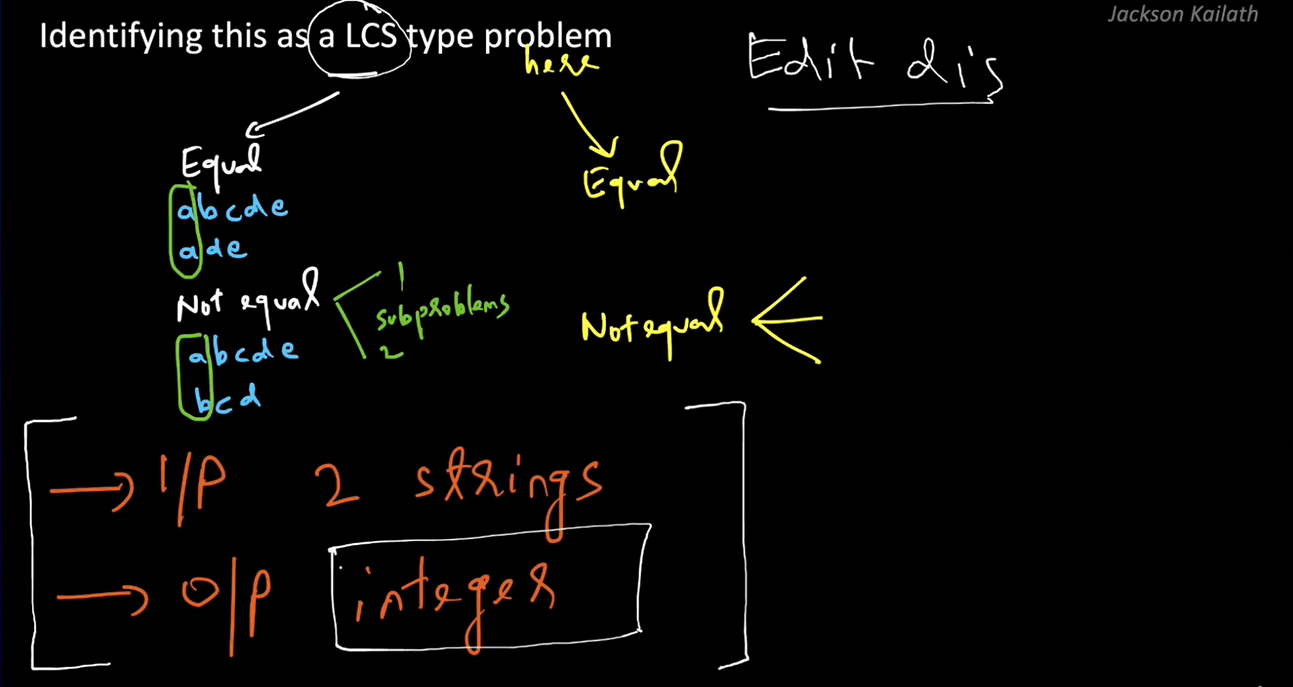

# Edit distance problem memoisation(top-down)-approach:
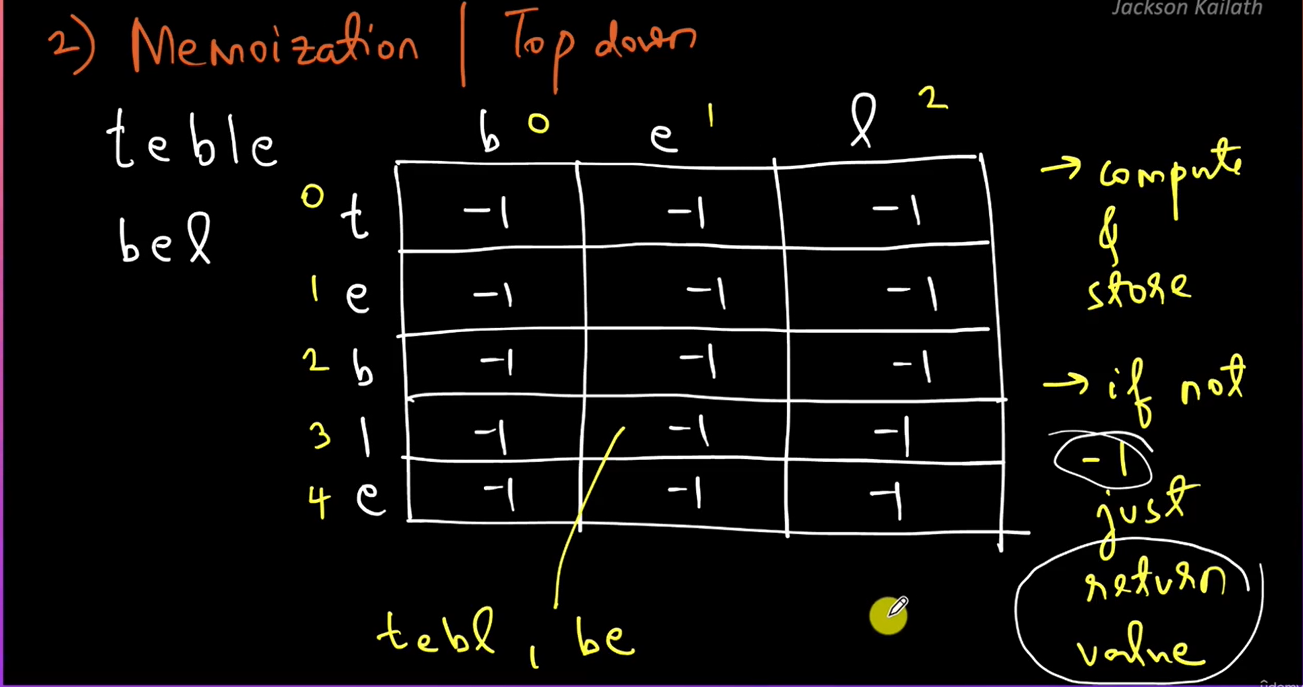
# Edit distance problem memoisation(top-down)-approach(complexity):
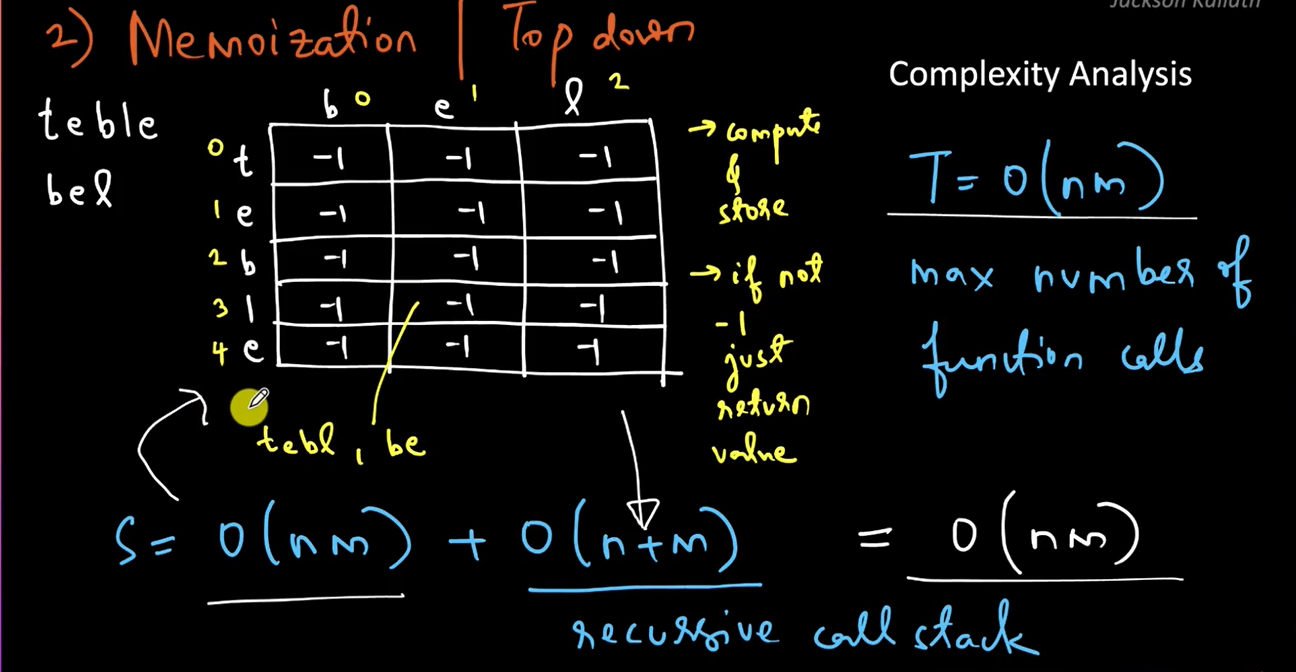
# Edit distance problem memoisation(top-down)-approach(code implementation):
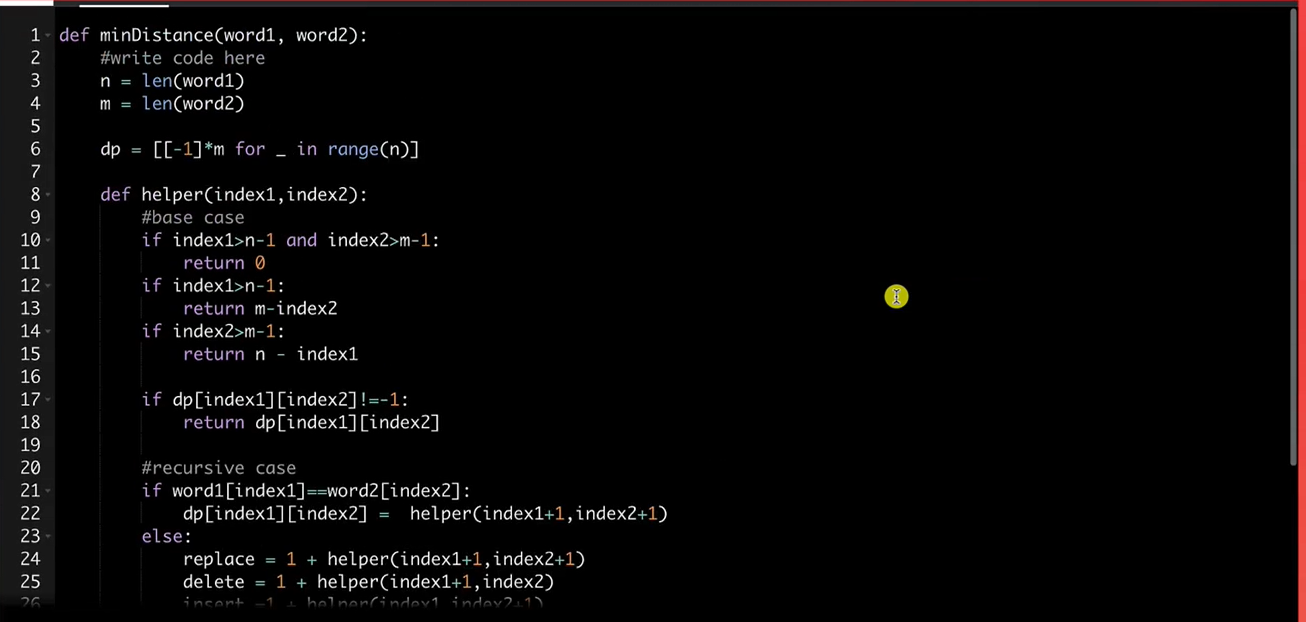
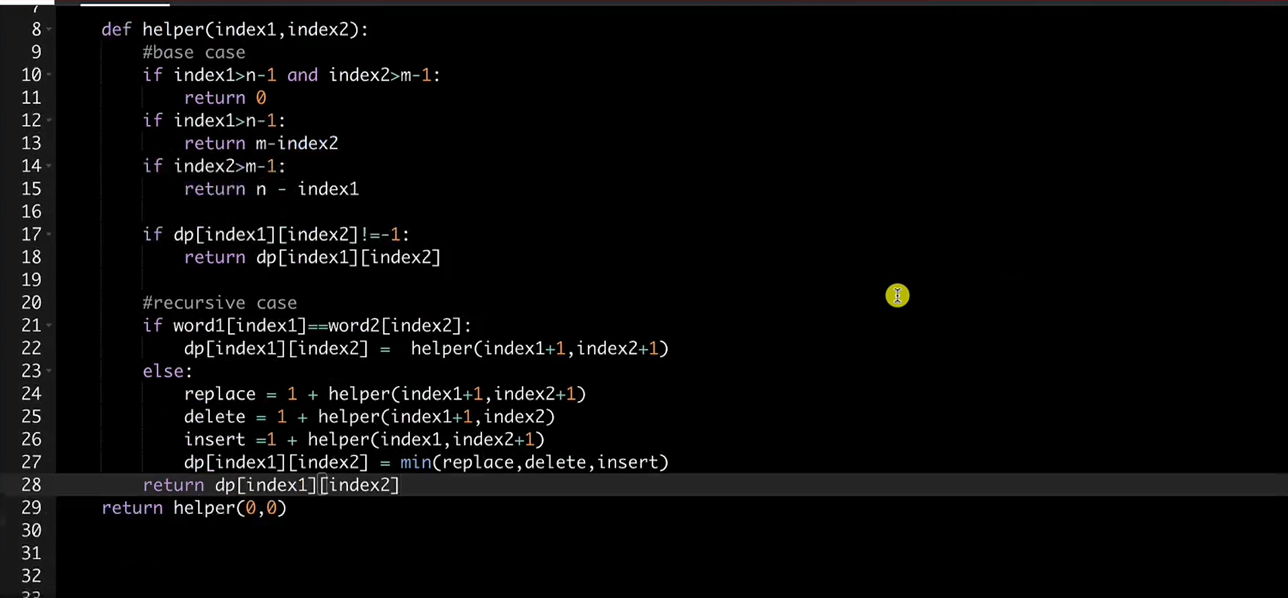

In [2]:
# code implementation of memoisation(top-down)approach for solving min edit ditance problem:

def EditDistance(word1, word2):
    n = len(word1)  # length of word1
    m = len(word2)  # length of word2
    #let's condtruct 2-3 dp_table of dimension n-row and m-colmns
    dp = [[-1]*m for _ in range(n)]  #each cell in the dp_table  initialised with -1
    
    # here is the recursive fn will take input as indexes of word1 & word2 respectively
    # we fill the cells of dp_table recursively 
    def min_distance_memo(index1,index2):
        #base cases:  there're three bases-cases possible 
        #base-case-1: when both the indexes reached end of string on word1 & word2
        if index1>n-1 and index2>m-1:
            return 0    # none of operation required at this scenerio
        #base-case-2: when index1 reached the end of string on word1
        if index1>n-1:
            return m-index2  # then we have to perofrm insert-operation extra-chars(of word2) times  // simply return number of extra-chars of word2 
        #base-case-3: when index2 reached the end of string on word2
        if index2>m-1:
            return n - index1 # then we have to perform delete operation on extra-chars(of word1) times  //simply return number of extra-chars of word1       
        
        # checking whether solution of sub-problem at corresponding indexes existed already in the dp_table or not : 
        if dp[index1][index2] != -1:
            return dp[index1][index2] # if yes then return value(solution) of a particular subproblem through corresponding indexes at dp_table
        #else: calculate solution to the subproblem at corresonding indexes and stored it to the corresponding indexes of dp_table
        # recursive cases:
        # if both the words equal on both the indexes of word1 & word2
        if word1[index1]==word2[index2]:
            dp[index1][index2] = min_distance_memo(index1+1,index2+1)  #then move both the indexes to the next  ; storing solution in the dp_table 
            return dp[index1][index2]
        #else : if the words NOT equal on both the indexes of word1 & word2
        insert = 1 + min_distance_memo(index1,index2+1)  # insert operation on word-1 , only index of word2 move to the next
        delete = 1 + min_distance_memo(index1+1,index2)  #delete operation on word-1, only index of word-1 move to the next
        replace = 1 + min_distance_memo(index1+1,index2+1)# replace operation on word1(based on curr-char of word2), both the indexes move to the next
        dp[index1][index2]=  min(insert,delete,replace)  # finally we have to choose minmum number of operation possible (among these insert,delete & replace branches or cases)    
        return dp[index1][index2]   # storing the  minimum-operation required solution to the dp_table and returning the dptable(at last indexes possible for both words)
    return min_distance_memo(0,0) # here recursive fn initialised with indexes zero     

# example usage :
text_1 ="teble"
text_2 ="bel"

print(EditDistance(text_1,text_2))  # should be 3

txt_1 ="hodse"
txt_2 ="dos"

print(EditDistance(txt_1,txt_2))


3
3


In [3]:
def minDistance(word1, word2):
    n = len(word1)
    m = len(word2)
    arr=[[-1]*m for _ in range(n)]
    def helper(index1,index2):
        #base condition
        if index1<0: return index2+1
        if index2<0:return index1+1
        #if index1 <0 and index2<0:return 0
        if arr[index1][index2] != -1:
            return arr[index1][index2]
        if word1[index1]==word2[index2]:
            arr[index1][index2] = helper(index1-1,index2-1) 
            return arr[index1][index2]
        #replace
        replace = 1 + helper(index1-1,index2-1)
        #delete
        delete = 1 + helper(index1-1,index2)
        #insert
        insert = 1 + helper(index1,index2-1)
        arr[index1][index2]= min(replace,delete,insert)
        return arr[index1][index2]
    return helper(n-1,m-1)   